In [10]:
# Imports

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from matplotlib.colors import SymLogNorm


In [11]:
with fits.open("J1645.4-7334_aFix_pol_I_15arcsec_fcube_cor.fits") as cube:
    cube_header = cube[0].header
    cube_data = cube[0].data
    wcs = WCS(cube_header)

frequencies = [908,952,996,1044,1093,1145,1318,1382,1448,1482,1592,1656]

for i in range(12):
    slice = cube_data[:, i, :, :]
    slice = np.squeeze(slice, axis=0)
    hdu = fits.PrimaryHDU(data=slice, header=cube_header)
    hdul = fits.HDUList([hdu])
    hdr = hdul[0].header
    hdr.set('Freq', frequencies[i])
    #print(repr(hdr))
    hdul.writeto(f'slice_{i}.fits', overwrite=True)


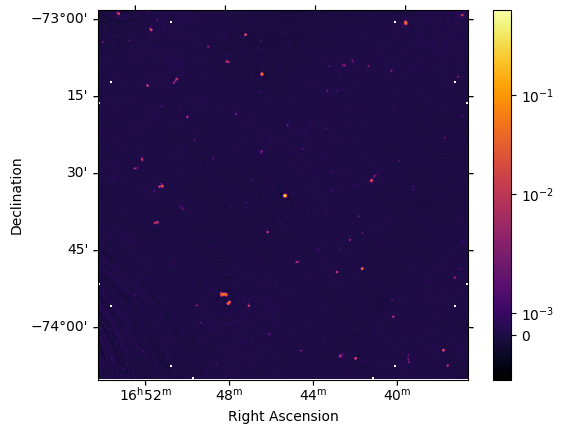

In [13]:
for i in range(12):
    ax = plt.subplot(projection=wcs, slices=('x', 'y', i,0))
    ax.coords[2].set_ticklabel(exclude_overlapping=True)
    map = ax.imshow(cube_data[0, i, :,:], norm=SymLogNorm(0.005), cmap='inferno')
    plt.colorbar(map)
    plt.xlabel('Right Ascension')
    plt.ylabel('Declination')
    plt.show()